In [3]:
from pathlib import Path

import pandas as pd
from scipy.stats import ranksums, spearmanr
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx"
df_species_totals = pd.read_excel(infile_metaphlan)
infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_relative_abundance.xlsx"
df_species_rel_ab = pd.read_excel(infile_metaphlan)

df_tnaA = pd.read_csv("/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA.columns]

df_tnaA_genus = pd.read_csv("/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_Diamond_TnaA_best_hit_80_Genus.csv",index_col=0)
df_tnaA_genus.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus.columns]
df_tnaA_genus

,021721_142,021721_183,021721_170,021721_129,021721_172,021721_74,021721_68,021721_107,021721_15,021721_27,...,021721_184,021721_116,021721_38,021721_186,021721_104,021721_189,021721_167,021721_159,021721_102,021721_23
Shigella,387.0,0.0,0.0,71.0,0.0,891.0,825.0,120.0,0.0,156.0,...,756.0,55.0,5651.0,601.0,388.0,774.0,490.0,210.0,93.0,381.0
Bacteroides,5.0,0.0,0.0,0.0,0.0,13.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Escherichia,35.0,0.0,0.0,4.0,0.0,98.0,87.0,19.0,0.0,7.0,...,79.0,3.0,572.0,47.0,44.0,100.0,48.0,15.0,5.0,38.0
Porphyromonas,0.0,1.0,0.0,59.0,32.0,0.0,45.0,1.0,3.0,30.0,...,0.0,2.0,0.0,0.0,33.0,1.0,8.0,9.0,5.0,8.0
Haemophilus,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
Clostridium,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,2.0,3.0,37.0,0.0,0.0,1.0,0.0,6.0
Anaerococcus,0.0,0.0,0.0,0.0,11.0,0.0,12.0,12.0,0.0,0.0,...,0.0,1.0,0.0,7.0,0.0,1.0,2.0,1.0,2.0,0.0
Fusobacterium,0.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Desulfitobacterium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Oribacterium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_relative_abundance.xlsx"
df_species_rel_ab = pd.read_excel(infile_metaphlan, index_col=0)
df_species_rel_ab.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_rel_ab]
df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx"
df_species_totals = pd.read_excel(infile_metaphlan,index_col=0)
df_species_totals.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_totals]

df_tnaA = df_tnaA.T.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_tnaA["read_frac"] = df_tnaA["read_sum"] / df_tnaA["k__Bacteria"] 

In [6]:


df_species_rel_ab

,021721_142,021721_183,021721_170,021721_129,021721_172,021721_74,021721_68,021721_107,021721_15,021721_27,...,021721_184,021721_116,021721_38,021721_186,021721_104,021721_189,021721_167,021721_159,021721_102,021721_23
g__Bifidobacterium,89.15780,81.17158,40.60035,15.50537,66.82176,87.36357,19.16318,30.21184,0.00000,45.33813,...,0.35209,86.66060,0.00000,53.18054,0.00000,74.20846,55.04737,0.00000,46.51124,25.29293
g__Escherichia,3.48613,0.00000,0.00350,0.72869,0.00000,5.56130,8.48368,1.97097,0.00000,1.92439,...,14.36542,0.43172,86.35187,8.42236,3.45272,6.99679,5.51672,4.09870,1.41614,4.26015
g__Streptococcus,2.67338,2.70133,0.96281,53.78691,0.16843,0.08869,1.73341,1.61210,3.90513,2.01979,...,0.00000,8.18597,0.93392,27.28437,2.29098,4.80166,8.78852,6.62898,0.05216,0.23727
g__Veillonella,2.15242,1.05421,0.02746,20.43797,0.45630,0.10134,5.38419,0.28500,3.59510,38.21400,...,0.00000,1.78513,0.00299,1.73106,0.00000,0.16272,13.69281,0.29350,4.34999,4.52195
g__Lactobacillus,0.71454,5.26260,23.02105,0.02597,2.55203,0.00000,0.02675,0.01084,0.02015,9.28492,...,24.02858,1.03919,0.00000,4.04696,19.55391,0.00000,0.05022,0.00000,4.50070,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g__Gardnerella,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Dermacoccus,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Chryseobacterium,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Comamonas,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [7]:
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("Escherichia")').T, left_index=True, right_index=True)
print(df_merge)

print(spearmanr(df_merge["read_frac"].values, df_merge["g__Escherichia"].values))
print(spearmanr(df_merge["read_sum"].values, df_merge["g__Escherichia"].values))

            read_sum  k__Bacteria     read_frac  g__Escherichia
021721_142       431     19314118  2.231528e-05         3.48613
021721_183         5     23598820  2.118750e-07         0.00000
021721_170        24     25531336  9.400213e-07         0.00350
021721_129       195     11612382  1.679242e-05         0.72869
021721_172        63     16998740  3.706157e-06         0.00000
...              ...          ...           ...             ...
021721_189       879     12242126  7.180125e-05         6.99679
021721_167       581     12378994  4.693435e-05         5.51672
021721_159       256     13748866  1.861972e-05         4.09870
021721_102       110     14157178  7.769910e-06         1.41614
021721_23        470     12027008  3.907871e-05         4.26015

[195 rows x 4 columns]
SpearmanrResult(correlation=0.7328962333097777, pvalue=4.053504973304995e-34)
SpearmanrResult(correlation=0.727225906416806, pvalue=2.260272767137176e-33)


In [8]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
for genus in genera_test:
    df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_sum"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.10807120984335891, pvalue=0.13262317504157886)
g__Escherichia SpearmanrResult(correlation=0.727225906416806, pvalue=2.260272767137176e-33)
g__Porphyromonas SpearmanrResult(correlation=0.011479083966785937, pvalue=0.8734550964634042)


In [9]:
genus = "g__Escherichia"
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.6482579


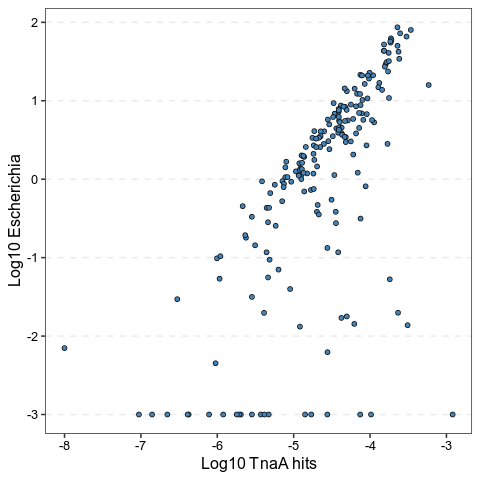

In [10]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 TnaA hits") + ylab("Log10 Escherichia")

In [11]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus.loc[["Shigella"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Shigella"] / df_tnaA["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.07104708024080837, pvalue=0.32364863119255993)
g__Escherichia SpearmanrResult(correlation=0.9781293777105139, pvalue=1.4232454069297484e-133)
g__Porphyromonas SpearmanrResult(correlation=0.006384772723725153, pvalue=0.9294107924106372)


In [12]:
genus = "g__Escherichia"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.9327957


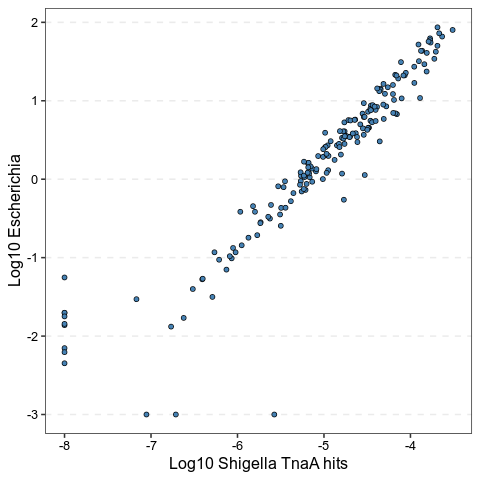

In [13]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Shigella TnaA hits") + ylab("Log10 Escherichia")

In [14]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus.loc[["Bacteroides"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Bacteroides"] / df_genus_oi["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.6340030579322037, pvalue=2.5569970361368537e-23)
g__Escherichia SpearmanrResult(correlation=0.060118368838257476, pvalue=0.4037935016329286)
g__Porphyromonas SpearmanrResult(correlation=0.11210209466547613, pvalue=0.1186941432518151)


In [15]:
genus = "g__Bacteroides"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.5611499


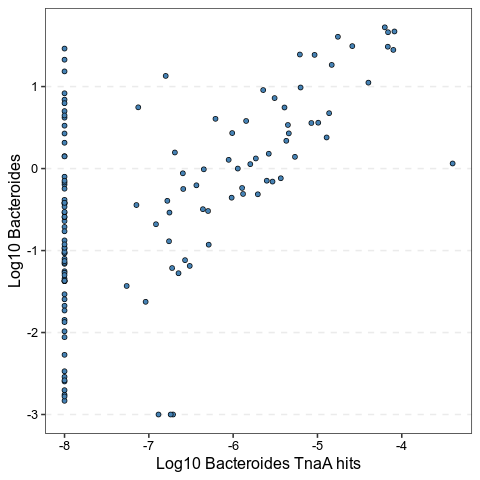

In [16]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")

[1] 0.7374416


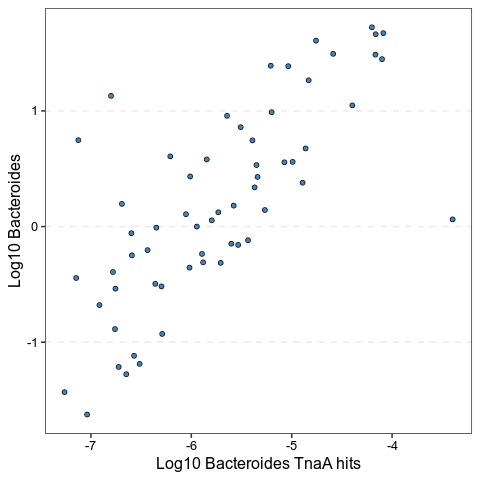

In [17]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) & (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")

### TEDDY

In [123]:
infile_metaphlan = "/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx"
df_species_totals = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_totals.columns = [x.split("_")[0] for x in df_species_totals.columns]

infile_metaphlan = "/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_metaphlan_combined_g_relative_abundance.xlsx"
df_species_rel_ab = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_rel_ab.columns = [x.split("_")[0] for x in df_species_rel_ab.columns]
df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

df_tnaA = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA.columns]

df_tnaA_genus = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_Diamond_TnaA_best_hit_80_Genus.csv",index_col=0)
df_tnaA_genus.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus.columns]
df_tnaA_genus

,SAMN09413948,SAMN09411704,SAMN09417045,SAMN09412341,SAMN09414035,SAMN09411603,SAMN09421053,SAMN09417964,SAMN09414074,SAMN09417039,...,SAMN09415416,SAMN09413699,SAMN09415410,SAMN09418426,SAMN09412013,SAMN09410612,SAMN09415437,SAMN09412571,SAMN09411635,SAMN09412931
Porphyromonas,1.0,89.0,4.0,1.0,2.0,5.0,4.0,0.0,0.0,1.0,...,1.0,0.0,1.0,4.0,0.0,2.0,2.0,0.0,4.0,12.0
Bacteroides,17.0,11.0,1.0,0.0,69.0,2.0,0.0,0.0,0.0,29.0,...,13.0,169.0,52.0,1.0,0.0,40.0,49.0,51.0,92.0,26.0
Clostridium,1.0,15.0,0.0,0.0,5.0,1.0,9.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,4.0,1.0,4.0,7.0,2.0
Fusobacterium,1.0,0.0,1.0,3.0,3.0,14.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,6.0,0.0,5.0,10.0,0.0,7.0,6.0
Haemophilus,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shigella,0.0,1.0,29.0,144.0,29.0,7.0,24.0,74.0,16.0,67.0,...,6.0,49.0,18.0,19.0,320.0,0.0,0.0,0.0,0.0,7.0
Desulfitobacterium,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
Anaerococcus,0.0,0.0,3.0,4.0,1.0,5.0,0.0,2.0,0.0,0.0,...,1.0,0.0,5.0,3.0,0.0,4.0,4.0,0.0,5.0,1.0
Escherichia,0.0,0.0,1.0,16.0,4.0,1.0,4.0,9.0,3.0,10.0,...,0.0,6.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0
Shuttleworthia,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
def get_genus_hits(df_tnaA_genus, df_species_totals, genera_oi):
    df_genus_oi = df_tnaA_genus.loc[genera_oi,:].T
    df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
    for genus in genera_oi:
        df_genus_oi["read_frac_{}".format(genus)] = df_genus_oi[genus] / df_genus_oi["k__Bacteria"] 
    return df_genus_oi

def add_bulk_hits(df, df_tnaA):
    df = df.merge(df_tnaA.T, left_index=True, right_index=True)
    df["read_sum_frac"] = df["read_sum"] / df["k__Bacteria"]
    return df

def add_metaphlan(df, df_species_rel_ab, genera_oi = None):
    if genera_oi is None:
        df_metaphlan = df_species_rel_ab.T
    else:
        df_metaphlan = df_species_rel_ab.query('index in @genera_oi').T
    return df.merge(df_metaphlan, left_index=True, right_index=True)

def add_metadata(df):
    indir = Path("/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/dbGaP-30876")
    infile_meta = indir / "TEDDY_10_Percent_Rand_Selected_220113.txt"
    df_teddy_meta = pd.read_csv(infile_meta, sep=" ")
    df_teddy_meta = df_teddy_meta[["BioSample","dbGaP_Subject_ID","collinterval"]].rename(columns={"collinterval":"age","dbGaP_Subject_ID":"Individual"})
    df_teddy_meta.index = df_teddy_meta["BioSample"]
    df_teddy_meta.drop(columns=["BioSample"],inplace=True)
    return df.merge(df_teddy_meta, left_index=True, right_index=True)

df = get_genus_hits(df_tnaA_genus, df_species_totals, ["Bacteroides","Shigella"])
df = add_bulk_hits(df, df_tnaA)
df = add_metaphlan(df, df_species_rel_ab, ["g__Bacteroides","g__Escherichia"])
df = add_metadata(df)
%Rpush df


	Spearman's rank correlation rho

data:  df$age and log10(df$read_sum_frac + 1e-07)
S = 250631433, p-value = 1.86e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2226208 

`geom_smooth()` using formula = 'y ~ x'


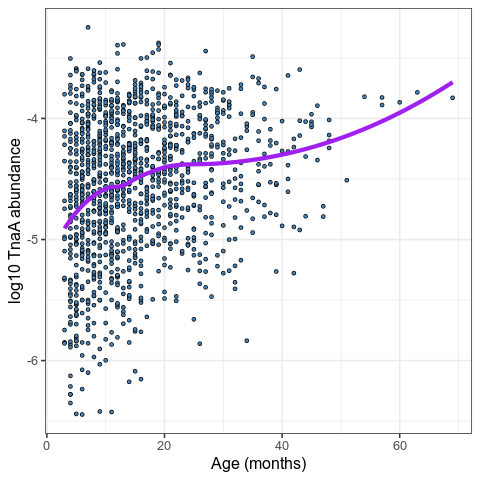

In [20]:
%%R

print(cor.test(df$age, log10(df$read_sum_frac + 1e-7), method="spearman"))
p1 <- ggplot(df, aes(x = age, y = log10(read_sum_frac + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) + geom_smooth(se=FALSE, color="purple", lwd=2, alpha=10, method="loess") +
                ylab("log10 TnaA abundance") + xlab("Age (months)")
print(p1)


             Bacteroides Shigella k__Bacteria read_frac_Bacteroides
SAMN09413948          17        0     3476990          4.889286e-06
SAMN09411704          11        1     7391465          1.488203e-06
SAMN09417045           1       29     2522536          3.964265e-07
SAMN09412341           0      144     5175319          0.000000e+00
SAMN09414035          69       29     5098852          1.353246e-05
SAMN09411603           2        7     3294718          6.070322e-07
             read_frac_Shigella read_sum read_sum_frac g__Bacteroides
SAMN09413948       0.000000e+00       33  9.490968e-06        0.88218
SAMN09411704       1.352912e-07      258  3.490512e-05        3.17215
SAMN09417045       1.149637e-05       40  1.585706e-05        0.00000
SAMN09412341       2.782437e-05      174  3.362112e-05        0.42520
SAMN09414035       5.687555e-06      124  2.431920e-05       13.48250
SAMN09411603       2.124613e-06       52  1.578284e-05        6.07207
             g__Escherichia Indivi

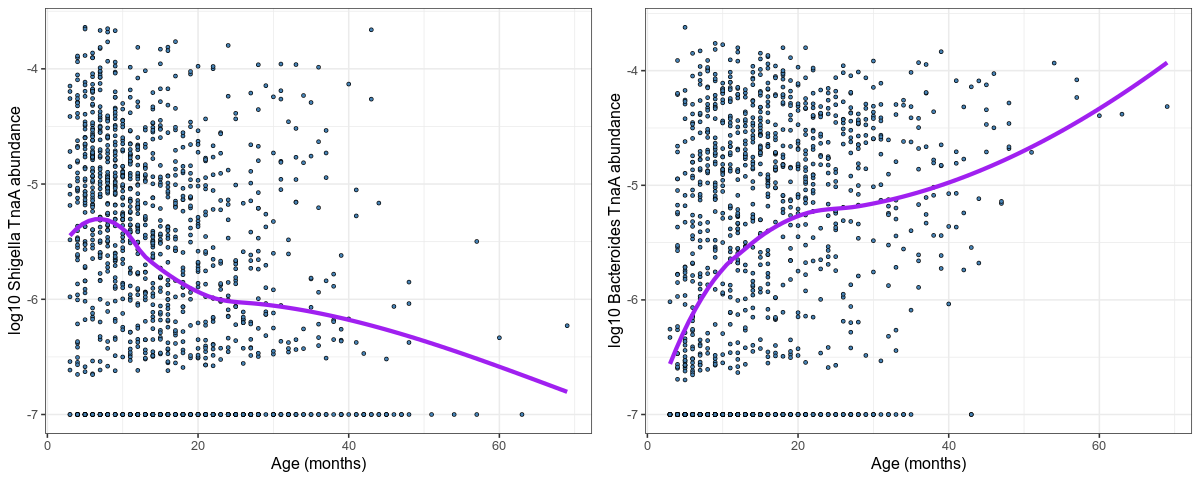

In [21]:
%%R -w 1200

library('ggplot2')
library('gridExtra')

print(head(df))
t <- improve_plot()

print(cor(df$age, log10(df$read_frac_Shigella + 1e-7), method = "spearman"))
print(cor.test(df$age, log10(df$read_frac_Shigella + 1e-7), method = "spearman")$p.value)

p1 <- ggplot(df, aes(x = age, y = log10(read_frac_Shigella + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) + geom_smooth(se=FALSE, color="purple", lwd=2, alpha=10, method="loess") +
                ylab("log10 Shigella TnaA abundance") + xlab("Age (months)")

print(cor(df$age, log10(df$read_frac_Bacteroides + 1e-7), method = "spearman"))
print(cor.test(df$age, log10(df$read_frac_Bacteroides + 1e-7), method = "spearman")$p.value)

p2 <- ggplot(df, aes(x = age, y = log10(read_frac_Bacteroides + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) + geom_smooth(se=FALSE, color="purple", lwd=2, alpha=10, method="loess") +
              ylab("log10 Bacteroides TnaA abundance")  + xlab("Age (months)")

grid.arrange(p1, p2, ncol=2)




             Bacteroides Shigella k__Bacteria read_frac_Bacteroides
SAMN09413948          17        0     3476990          4.889286e-06
SAMN09411704          11        1     7391465          1.488203e-06
SAMN09417045           1       29     2522536          3.964265e-07
SAMN09412341           0      144     5175319          0.000000e+00
SAMN09414035          69       29     5098852          1.353246e-05
SAMN09411603           2        7     3294718          6.070322e-07
             read_frac_Shigella read_sum read_sum_frac g__Bacteroides
SAMN09413948       0.000000e+00       33  9.490968e-06        0.88218
SAMN09411704       1.352912e-07      258  3.490512e-05        3.17215
SAMN09417045       1.149637e-05       40  1.585706e-05        0.00000
SAMN09412341       2.782437e-05      174  3.362112e-05        0.42520
SAMN09414035       5.687555e-06      124  2.431920e-05       13.48250
SAMN09411603       2.124613e-06       52  1.578284e-05        6.07207
             g__Escherichia Indivi

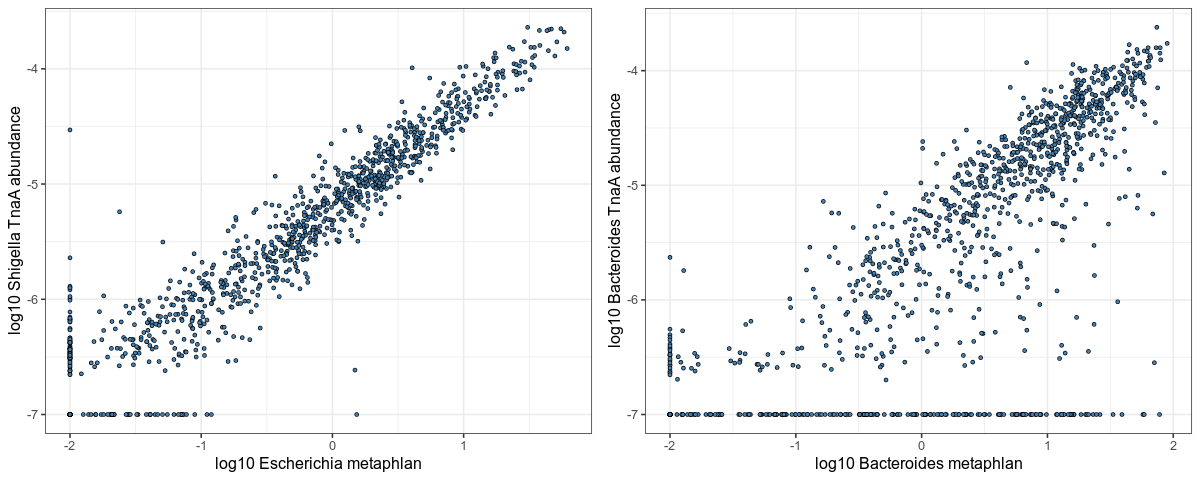

In [22]:
%%R -w 1200

library('ggplot2')
library('gridExtra')

print(head(df))

print(cor(df$age, log10(df$read_frac_Shigella + 1e-7), method = "spearman"))
print(cor.test(df$age, log10(df$read_frac_Shigella + 1e-7), method = "spearman")$p.value)

p1 <- ggplot(df, aes(x = log10(g__Escherichia + 1e-2), y = log10(read_frac_Shigella + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) +
                ylab("log10 Shigella TnaA abundance") + xlab("log10 Escherichia metaphlan")

print(cor(df$age, log10(df$read_frac_Bacteroides + 1e-7), method = "spearman"))
print(cor.test(df$age, log10(df$read_frac_Bacteroides + 1e-7), method = "spearman")$p.value)

p2 <- ggplot(df, aes(x = log10(g__Bacteroides + 1e-2), y = log10(read_frac_Bacteroides + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) +
              ylab("log10 Bacteroides TnaA abundance")  + xlab("log10 Bacteroides metaphlan")

grid.arrange(p1, p2, ncol=2)

In [23]:
print(df_tnaA_genus.sum(1).sort_values())

df = get_genus_hits(df_tnaA_genus, df_species_totals, ["Akkermansia","Porphyromonas","Alistipes","Fusobacterium"])
df = add_bulk_hits(df, df_tnaA)
df = add_metaphlan(df, df_species_rel_ab)
df = add_metadata(df)
%Rpush df

Propionibacterium         14.0
Eubacterium               19.0
Symbiobacterium           21.0
Brachyspira               92.0
Oribacterium             230.0
Shuttleworthia           343.0
Haemophilus              573.0
Desulfitobacterium       971.0
Faecalibacterium        3228.0
Clostridium             4737.0
Anaerococcus            5222.0
Fusobacterium           6163.0
Alistipes               6986.0
Escherichia             8260.0
Porphyromonas           9938.0
Akkermansia            56864.0
Shigella               83580.0
Bacteroides           106585.0
dtype: float64


In [24]:
%%R

print(cor(log10(df$read_frac_Fusobacterium + 1e-8), log10(df$g__Fusobacterium + 1e-3), method="spearman"))
print(cor(log10(df$read_frac_Akkermansia + 1e-8), log10(df$g__Akkermansia + 1e-3), method="spearman"))
print(cor(log10(df$read_frac_Alistipes + 1e-8), log10(df$g__Alistipes + 1e-3), method="spearman"))
print(cor(log10(df$read_frac_Porphyromonas + 1e-8), log10(df$g__Porphyromonas + 1e-3), method="spearman"))

[1] 0.07976092
[1] 0.8997826
[1] 0.7953587
[1] 0.07493203


In [25]:
%%R

library('stringr')
library('tidyverse')

df_out <- data.frame()
for (genus in colnames(df)[str_detect(colnames(df), "g__")]) {
    cor.val <- cor(log10(df$read_frac_Fusobacterium + 1e-8), log10(df[,genus] + 1e-3), method="spearman")
    df_out <- bind_rows(df_out, data.frame(genus, cor.val))
}

arrange(df_out, desc(cor.val)) %>% head

── Attaching core tidyverse packages ───────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
                genus   cor.val
1    g__Agathobaculum 0.5625942
2 g__Ruthenibacterium 0.5506562
3        g__Alistipes 0.4732590
4      g__Eubacterium 0.4590809
5 g__Faecalibacterium 0.4566762
6     g__Anaerostipes 0.4445991


In [26]:
%%R

library('stringr')
library('tidyverse')

df_out <- data.frame()
for (genus in colnames(df)[str_detect(colnames(df), "g__")]) {
    cor.val <- cor(log10(df$read_frac_Porphyromonas + 1e-8), log10(df[,genus] + 1e-3), method="spearman")
    df_out <- bind_rows(df_out, data.frame(genus, cor.val))
}

arrange(df_out, desc(cor.val)) %>% head

                genus   cor.val
1        g__Alistipes 0.4397933
2   g__Flavonifractor 0.3746791
3      g__Bacteroides 0.3682477
4 g__Faecalibacterium 0.3611480
5      g__Odoribacter 0.3461292
6        g__Roseburia 0.3372505


### Dart VS. TEDDY

In [27]:

infile_metaphlan = "/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx"
df_species_totals = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_totals.columns = [x.split("_")[0] for x in df_species_totals.columns]

infile_metaphlan = "/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_metaphlan_combined_g_relative_abundance.xlsx"
df_species_rel_ab = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_rel_ab.columns = [x.split("_")[0] for x in df_species_rel_ab.columns]
df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

df_tnaA = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA.columns]

df_tnaA_genus = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/TEDDY/Results/TEDDY_Diamond_TnaA_best_hit_80_Genus.csv",index_col=0)
df_tnaA_genus.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus.columns]

df = get_genus_hits(df_tnaA_genus, df_species_totals, ["Bacteroides","Shigella"])
df = add_bulk_hits(df, df_tnaA)
df = add_metaphlan(df, df_species_rel_ab, ["g__Bacteroides","g__Escherichia"])
df = add_metadata(df)
df_teddy = df

In [28]:

infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx"
df_species_totals = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_totals.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_totals.columns]

infile_metaphlan = "/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_metaphlan_combined_g_relative_abundance.xlsx"
df_species_rel_ab = pd.read_excel(infile_metaphlan, index_col="clade")
df_species_rel_ab.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_rel_ab.columns]

df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

df_tnaA = pd.read_csv("/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA.columns]

df_tnaA_genus = pd.read_csv("/dartfs/rc/lab/R/RossB/DartCF_infant_meta/Results/dart_CF_Diamond_TnaA_best_hit_80_Genus.csv",index_col=0)
df_tnaA_genus.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus.columns]

df = get_genus_hits(df_tnaA_genus, df_species_totals, ["Bacteroides","Shigella"])
df = add_bulk_hits(df, df_tnaA)
df = add_metaphlan(df, df_species_rel_ab, ["g__Bacteroides","g__Escherichia"])

df_dart = df
df_dart

,Bacteroides,Shigella,k__Bacteria,read_frac_Bacteroides,read_frac_Shigella,read_sum,read_sum_frac,g__Escherichia,g__Bacteroides
021721_142,5.0,387.0,19314118,2.588780e-07,0.000020,431,2.231528e-05,3.48613,0.07532
021721_183,0.0,0.0,23598820,0.000000e+00,0.000000,5,2.118750e-07,0.00000,0.00000
021721_170,0.0,0.0,25531336,0.000000e+00,0.000000,24,9.400213e-07,0.00350,0.00000
021721_129,0.0,71.0,11612382,0.000000e+00,0.000006,195,1.679242e-05,0.72869,0.00000
021721_172,0.0,0.0,16998740,0.000000e+00,0.000000,63,3.706157e-06,0.00000,0.38549
...,...,...,...,...,...,...,...,...,...
021721_189,0.0,774.0,12242126,0.000000e+00,0.000063,879,7.180125e-05,6.99679,0.07333
021721_167,0.0,490.0,12378994,0.000000e+00,0.000040,581,4.693435e-05,5.51672,0.04179
021721_159,0.0,210.0,13748866,0.000000e+00,0.000015,256,1.861972e-05,4.09870,0.00000
021721_102,0.0,93.0,14157178,0.000000e+00,0.000007,110,7.769910e-06,1.41614,0.00000


In [29]:
from scipy.stats import ranksums
import numpy as np
vals1 = df_dart["read_sum_frac"].values
vals2 = df_teddy["read_sum_frac"].values
print(np.median(vals1), np.median(vals2))
ranksums(vals1, vals2)

3.133483922556894e-05 3.453861410837269e-05


RanksumsResult(statistic=-1.2773403193865986, pvalue=0.2014821248411537)

In [30]:
infile_metadata = "../CF_Metabolomics/CF_MetaData.xlsx"
df_meta_dart = pd.read_excel(infile_metadata, engine='openpyxl')

df_dart = df_dart.merge(df_meta_dart[["Directory","Individual","Age_At_Collection_Date_Months"]], left_index=True, right_on="Directory")
print(df_dart.head())

     Bacteroides  Shigella  k__Bacteria  read_frac_Bacteroides  \
133          5.0     387.0     19314118           2.588780e-07   
147          0.0       0.0     23598820           0.000000e+00   
162          0.0       0.0     25531336           0.000000e+00   
82           0.0      71.0     11612382           0.000000e+00   
141          0.0       0.0     16998740           0.000000e+00   

     read_frac_Shigella  read_sum  read_sum_frac  g__Escherichia  \
133            0.000020       431   2.231528e-05         3.48613   
147            0.000000         5   2.118750e-07         0.00000   
162            0.000000        24   9.400213e-07         0.00350   
82             0.000006       195   1.679242e-05         0.72869   
141            0.000000        63   3.706157e-06         0.00000   

     g__Bacteroides   Directory  Individual  Age_At_Collection_Date_Months  
133         0.07532  021721_142         135                       7.232084  
147         0.00000  021721_183         

In [31]:
from sklearn.linear_model import LinearRegression
m = LinearRegression().fit( df_dart["Age_At_Collection_Date_Months"].values.reshape(-1,1), np.log10(df_dart["read_sum_frac"] + 1e-10).values.reshape(-1,1))
residuals_dart = m.predict( df_dart["Age_At_Collection_Date_Months"].values.reshape(-1,1)) - np.log10(df_dart["read_sum_frac"] + 1e-10).values.reshape(-1,1)

m = LinearRegression().fit( df_teddy["age"].values.reshape(-1,1), np.log10(df_teddy["read_sum_frac"] + 1e-10).values.reshape(-1,1))
residuals_teddy = m.predict( df_teddy["age"].values.reshape(-1,1)) - np.log10(df_teddy["read_sum_frac"] + 1e-10).values.reshape(-1,1)

In [32]:
print(np.median(residuals_dart), np.median(residuals_teddy))
ranksums(residuals_dart, residuals_teddy)

-0.1370511946509776 -0.059524012987147046


RanksumsResult(statistic=-1.1289459379690123, pvalue=0.25892064029598816)

In [33]:
print(df_dart["Age_At_Collection_Date_Months"].mean())
print(df_teddy["age"].mean())

12.208553929042104
15.796147672552166


In [34]:
df_dart_sub = df_dart[["read_sum_frac","Age_At_Collection_Date_Months"]]
%Rpush df_dart_sub


	Spearman's rank correlation rho

data:  df_dart_sub$Age_At_Collection_Date_Months and log10(df_dart_sub$read_sum_frac + 1e-07)
S = 1251899, p-value = 0.1916
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.09514512 

`geom_smooth()` using formula = 'y ~ x'


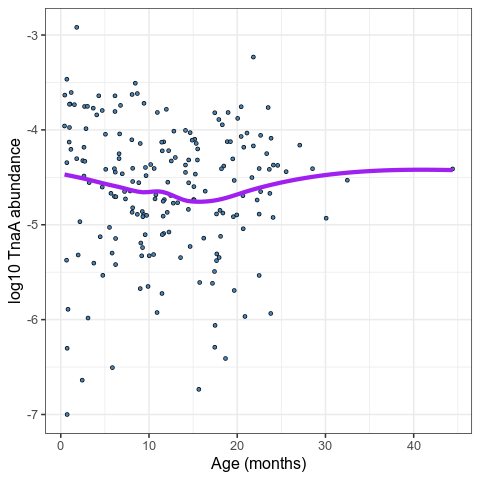

In [35]:
%%R

library('ggplot2')

print(cor.test(df_dart_sub$Age_At_Collection_Date_Months, log10(df_dart_sub$read_sum_frac + 1e-7), method="spearman"))
p1 <- ggplot(df_dart_sub, aes(x = Age_At_Collection_Date_Months, y = log10(read_sum_frac + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) + geom_smooth(se=FALSE, color="purple", lwd=2, alpha=10, method="loess") +
                ylab("log10 TnaA abundance") + xlab("Age (months)") + theme(text=element_text(size=16, color="black", family="Arial"))
print(p1)



	Spearman's rank correlation rho

data:  df_dart_sub$Age_At_Collection_Date_Months and log10(df_dart_sub$read_sum_frac + 1e-07)
S = 1191305, p-value = 0.205
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.09310454 

`geom_smooth()` using formula = 'y ~ x'


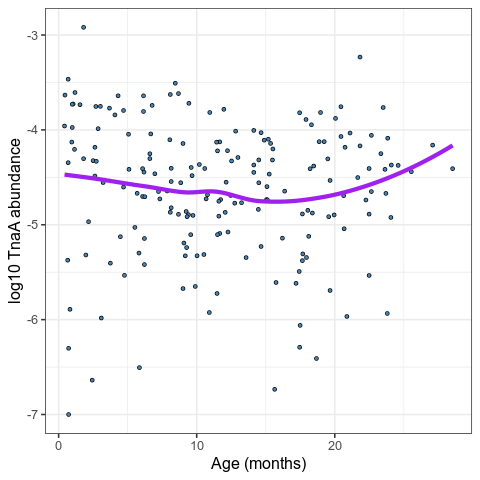

In [36]:
%%R

library('ggplot2')
library('tidyverse')

df_dart_sub <- filter(df_dart_sub, Age_At_Collection_Date_Months <= 30)

print(cor.test(df_dart_sub$Age_At_Collection_Date_Months, log10(df_dart_sub$read_sum_frac + 1e-7), method="spearman"))
p1 <- ggplot(df_dart_sub, aes(x = Age_At_Collection_Date_Months, y = log10(read_sum_frac + 1e-7))) + geom_point(pch=21, fill="steelblue") + theme_bw(16) + geom_smooth(se=FALSE, color="purple", lwd=2, alpha=10, method="loess") +
                ylab("log10 TnaA abundance") + xlab("Age (months)") + theme(text=element_text(size=16, color="black", family="Arial"))
print(p1)


In [37]:
from scipy.stats import ranksums
import numpy as np
vals1 = df_dart.query('Age_At_Collection_Date_Months >= 18')["read_sum_frac"].values
vals2 = df_teddy.query('age >= 18')["read_sum_frac"].values
print(np.median(vals1), np.median(vals2))
ranksums(vals1, vals2)

3.866693729912418e-05 4.709930417613159e-05


RanksumsResult(statistic=-1.7698639747075737, pvalue=0.07674980341373226)

In [38]:
from scipy.stats import ranksums
import numpy as np
vals1 = df_dart.query('Age_At_Collection_Date_Months >= 12')["read_sum_frac"].values
vals2 = df_teddy.query('age >= 12')["read_sum_frac"].values
print(np.median(vals1), np.median(vals2))
ranksums(vals1, vals2)

2.937473399016595e-05 4.173913855671896e-05


RanksumsResult(statistic=-2.902137520684018, pvalue=0.003706258006557386)

## DIABIMMUNE

In [39]:
infile_metaphlan_vat = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx")
infile_metaphlan_kos = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx")
infile_metaphlan_yas = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx")
infile_metaphlan_diab = pd.merge(infile_metaphlan_vat, infile_metaphlan_kos, on='clade', how='outer') 
df_species_totals = pd.merge(infile_metaphlan_diab, infile_metaphlan_yas, on='clade', how='outer')


infile_metaphlan_vat = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_metaphlan_combined_g_relative_abundance.xlsx")
infile_metaphlan_kos = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_metaphlan_combined_g_relative_abundance.xlsx")
infile_metaphlan_yas = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_metaphlan_combined_g_relative_abundance.xlsx")
infile_metaphlan_diab = pd.merge(infile_metaphlan_vat, infile_metaphlan_kos, on='clade', how='outer') 
df_species_rel_ab = pd.merge(infile_metaphlan_diab, infile_metaphlan_yas, on='clade', how='outer')


df_tnaA_vat = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA_kos = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA_yas = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA_diab = pd.concat([df_tnaA_vat, df_tnaA_kos, df_tnaA_yas], axis=1)
df_tnaA_diab.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_diab.columns]

df_tnaA_genus_vat = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_Diamond_TnaA_best_hit_80_Genus.csv", index_col=0)
df_tnaA_genus_kos = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_Diamond_TnaA_best_hit_80_Genus.csv", index_col=0)
df_tnaA_genus_yas = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_Diamond_TnaA_best_hit_80_Genus.csv", index_col=0)
df_tnaA_genus_diab = pd.concat([df_tnaA_genus_vat, df_tnaA_genus_kos, df_tnaA_genus_yas], axis=1) 
df_tnaA_genus_diab.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus_diab.columns]


In [40]:
infile_metaphlan_vat = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_metaphlan_combined_g_relative_abundance.xlsx", index_col=0)
infile_metaphlan_kos = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_metaphlan_combined_g_relative_abundance.xlsx", index_col=0)
infile_metaphlan_yas = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_metaphlan_combined_g_relative_abundance.xlsx", index_col=0)
infile_metaphlan_diab = pd.merge(infile_metaphlan_vat, infile_metaphlan_kos, on='clade', how='outer') 
df_species_rel_ab = pd.merge(infile_metaphlan_diab, infile_metaphlan_yas, on='clade', how='outer')
df_species_rel_ab.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_rel_ab]
df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

infile_metaphlan_vat = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Vatanen2016/Results/Vatanen_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx", index_col=0)
infile_metaphlan_kos = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Kostic2015/Results/Kostic_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx", index_col=0)
infile_metaphlan_yas = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Yassour2016/Results/Yassour_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx", index_col=0)
infile_metaphlan_diab = pd.merge(infile_metaphlan_vat, infile_metaphlan_kos, on='clade', how='outer') 
df_species_totals = pd.merge(infile_metaphlan_diab, infile_metaphlan_yas, on='clade', how='outer')
df_species_totals.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_totals]

df_tnaA = df_tnaA_diab.T.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_tnaA["read_frac"] = df_tnaA["read_sum"] / df_tnaA["k__Bacteria"] 
print(df_tnaA)

              read_sum  k__Bacteria     read_frac
G80158            19.0    9410401.0  2.019043e-06
G78791           102.0    1634384.0  6.240883e-05
G78823           785.0    7183909.0  1.092720e-04
G80474           213.0    4740604.0  4.493098e-05
G78555           245.0    1616113.0  1.515983e-04
...                ...          ...           ...
E021822_24.6     825.0   13954567.0  5.912043e-05
E016063_23.0      52.0   11404462.0  4.559619e-06
E000823_1.8        2.0      21215.0  9.427292e-05
E010581_1.7        2.0    7978827.0  2.506634e-07
E003188_1.5       20.0    3565477.0  5.609348e-06

[1178 rows x 3 columns]


In [41]:
df_species_rel_ab

,G80158,G78791,G78823,G80474,G78555,G80306,G80314,G78656,G80436,G78561,...,E018286_2.2,E035134_2.9,E012854_1.9,E006091_23.5,E016426_11.4,E021822_24.6,E016063_23.0,E000823_1.8,E010581_1.7,E003188_1.5
g__Ruminococcus,45.60469,0.00000,19.86927,0.00000,1.31774,0.00000,0.00000,0.00000,0.00709,0.00000,...,0.00000,0.00000,0.00000,5.99622,0.00000,0.00000,3.03616,0.00000,0.00000,0.00000
g__Bifidobacterium,15.26717,8.58365,2.91766,7.80738,0.00000,0.82506,1.67417,6.95345,22.47742,59.91417,...,0.31118,33.41109,13.34715,15.09771,45.07801,0.05431,16.74103,8.30452,96.40760,52.55089
g__Lachnospiraceae_unclassified,10.30435,2.69700,0.74660,0.00000,0.00000,3.66372,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,2.90512,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Bacteroides,5.17219,4.79699,44.38071,68.52370,59.06367,75.60748,60.53069,59.41816,6.38120,1.17242,...,0.83597,48.73492,58.21228,36.36742,14.21976,40.12761,55.04603,64.62013,0.01958,38.38214
g__Propionibacterium,4.04665,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g__Chlamydia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Pseudescherichia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Agitococcus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Franconibacter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [42]:
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("Escherichia")').T, left_index=True, right_index=True)
print(df_merge)

print(spearmanr(df_merge["read_frac"].values, df_merge["g__Escherichia"].values))
print(spearmanr(df_merge["read_sum"].values, df_merge["g__Escherichia"].values))

              read_sum  k__Bacteria     read_frac  g__Escherichia
G80158            19.0    9410401.0  2.019043e-06         0.00197
G78791           102.0    1634384.0  6.240883e-05         1.55169
G78823           785.0    7183909.0  1.092720e-04         0.50960
G80474           213.0    4740604.0  4.493098e-05         8.93065
G78555           245.0    1616113.0  1.515983e-04         0.00000
...                ...          ...           ...             ...
E021822_24.6     825.0   13954567.0  5.912043e-05         0.00000
E016063_23.0      52.0   11404462.0  4.559619e-06         0.28530
E000823_1.8        2.0      21215.0  9.427292e-05        27.07535
E010581_1.7        2.0    7978827.0  2.506634e-07         0.00000
E003188_1.5       20.0    3565477.0  5.609348e-06         0.54698

[1178 rows x 4 columns]
SpearmanrResult(correlation=0.1268151065040514, pvalue=1.2679519468923172e-05)
SpearmanrResult(correlation=0.09207669119130452, pvalue=0.0015581790783719067)


In [43]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
for genus in genera_test:
    df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_sum"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.29209661689762195, pvalue=1.3286474895893652e-24)
g__Escherichia SpearmanrResult(correlation=0.09207669119130452, pvalue=0.0015581790783719067)
g__Porphyromonas SpearmanrResult(correlation=0.09080993245950736, pvalue=0.0018090134256211821)


In [44]:
genus = "g__Escherichia"
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.1684858


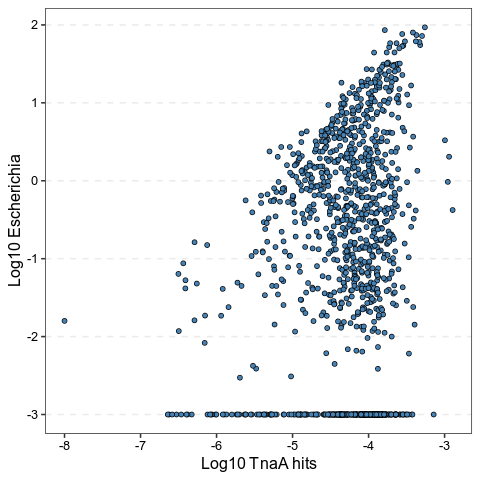

In [45]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 TnaA hits") + ylab("Log10 Escherichia")

In [46]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus_diab.loc[["Shigella"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Shigella"] / df_tnaA["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=-0.2207270891908769, pvalue=1.82416866239395e-14)
g__Escherichia SpearmanrResult(correlation=0.9282793812804979, pvalue=0.0)
g__Porphyromonas SpearmanrResult(correlation=0.0276319902384878, pvalue=0.34335381426495637)


In [47]:
genus = "g__Escherichia"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.7994428


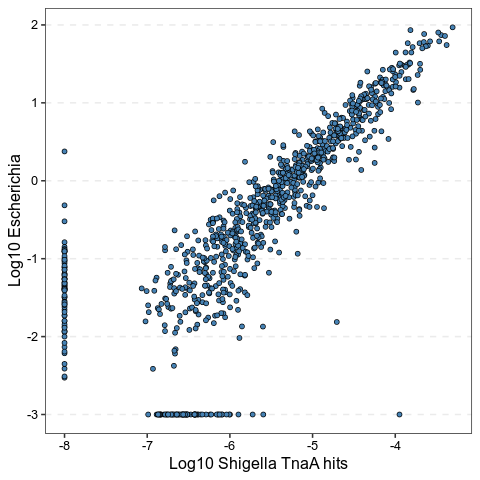

In [48]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Shigella TnaA hits") + ylab("Log10 Escherichia")

In [49]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus_diab.loc[["Bacteroides"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Bacteroides"] / df_genus_oi["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.5708980638780307, pvalue=7.760893166074426e-103)
g__Escherichia SpearmanrResult(correlation=-0.1990586077734571, pvalue=5.426771803219788e-12)
g__Porphyromonas SpearmanrResult(correlation=0.018985793149805346, pvalue=0.515048191975553)


In [50]:
genus = "g__Bacteroides"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
%Rpush df_merge

[1] 0.5505039


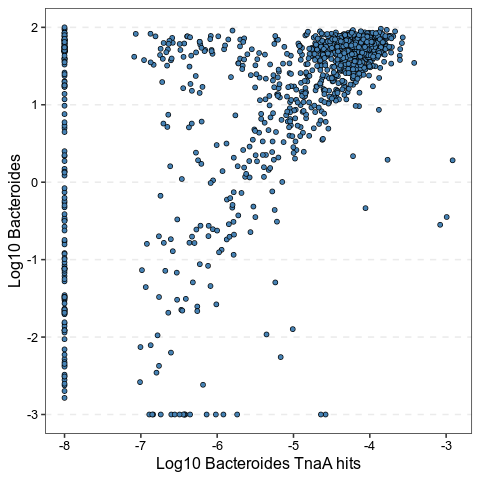

In [51]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")

[1] 0.590126


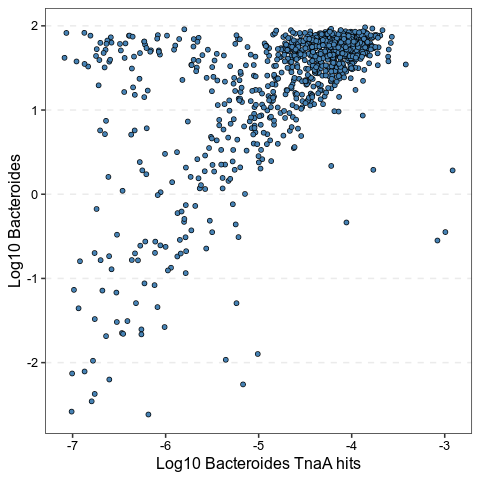

In [52]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) & (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")

## Hayden

#### Select included samples only and then plot separately?

In [96]:
# Samples from Metabolomics
infile_metadata = pd.read_csv("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Metabolomics/metabolomics_metadata_230620.csv")


0      SRR8354095
1      SRR8353911
2      SRR8428185
3      SRR8428156
4      SRR8427669
          ...    
231    SRR8353901
232    SRR8427760
233    SRR8427776
234    SRR8353904
235    SRR8353914
Name: SRR, Length: 236, dtype: object


In [99]:
infile_metaphlan = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx")

infile_metaphlan = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_metaphlan_combined_2_g.xlsx")

df_tnaA = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_Diamond_TnaA_read_sum_30_Genus.csv",index_col=0)
df_tnaA.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA.columns]

df_tnaA_genus = pd.read_csv("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_Diamond_TnaA_best_hit_80_Genus.csv", index_col=0)
df_tnaA_genus.columns = [x.replace("_Diamond_TnaA.tsv","") for x in df_tnaA_genus.columns]

In [100]:
df_species_rel_ab = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_metaphlan_combined_2_g.xlsx", index_col=0)
df_species_rel_ab.columns = [x.replace("_metaphlan_2.txt","") for x in df_species_rel_ab]
df_species_rel_ab.index = [x.split("|")[-1] for x in df_species_rel_ab.index]

df_species_totals = pd.read_excel("/dartfs/rc/lab/R/RossB/OtherLabsPublished/Hayden2020/Results/Hayden_metaphlan_combined_g_estimated_number_of_reads_from_the_clade.xlsx", index_col=0)
df_species_totals.columns = [x.replace("_metaphlan_rel_ab_w_read_stats.txt","") for x in df_species_totals]

df_tnaA = df_tnaA.T.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_tnaA["read_frac"] = df_tnaA["read_sum"] / df_tnaA["k__Bacteria"] 


In [101]:
df_species_rel_ab

,SRR8353610,SRR8427627,SRR8353926,SRR8427669,SRR8353662,SRR8427693,SRR8427649,SRR8354094,SRR8353851,SRR8353634,...,SRR8353569,SRR8353899,SRR8353839,SRR8427760,SRR8353688,SRR8427969,SRR8428178,SRR8353570,SRR8427880,SRR8353982
g__Bifidobacterium,47.95107,65.51117,0.06152,99.30702,19.09692,89.71407,88.39514,94.60976,0.00000,59.34769,...,50.11223,0.84864,38.83267,33.69577,0.00000,2.25911,82.59055,24.41540,0.00000,42.42582
g__Streptococcus,14.45425,0.00401,2.24242,0.06075,1.60082,0.04302,0.00000,0.61429,0.55372,7.00280,...,2.31921,0.71773,0.14679,1.24290,11.29378,0.09071,0.72098,2.99459,10.06648,0.48456
g__Veillonella,11.11701,4.84486,2.12939,0.00475,31.97644,0.00550,0.00000,0.80349,0.27109,1.25936,...,6.27321,4.62003,1.60703,0.39021,34.61263,0.33538,0.72482,0.63846,1.47524,0.57841
g__Ruminococcus,10.47461,2.96151,0.00000,0.00000,0.00000,0.41087,0.00000,0.00000,0.00000,0.00000,...,0.00000,5.51449,0.00000,8.46805,15.59777,0.00000,1.13416,27.27805,61.62084,0.00000
g__Eubacterium,6.77953,0.00000,0.00000,0.00000,0.00000,0.00000,0.03184,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.32915,0.00000,0.00000,0.00000,9.70812,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g__Parvimonas,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Actinobacillus,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Actinobaculum,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
g__Fructobacillus,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [102]:
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("Escherichia")').T, left_index=True, right_index=True)
print(df_merge)

print(spearmanr(df_merge["read_frac"].values, df_merge["g__Escherichia"].values))
print(spearmanr(df_merge["read_sum"].values, df_merge["g__Escherichia"].values))

            read_sum  k__Bacteria     read_frac  g__Escherichia
SRR8353610        57     15309037  3.723291e-06         0.72848
SRR8427627       540      9400768  5.744212e-05        25.50923
SRR8353926       504     10015109  5.032397e-05         0.00000
SRR8427669         3      5131145  5.846648e-07         0.34120
SRR8353662        49      6672391  7.343694e-06         0.00000
...              ...          ...           ...             ...
SRR8427969        63      8933984  7.051725e-06         2.39864
SRR8428178        11      8877730  1.239055e-06         0.00000
SRR8353570        33      4983365  6.622031e-06         2.50102
SRR8427880         8      8140746  9.827109e-07         0.00000
SRR8353982       193      7696931  2.507493e-05         9.71217

[244 rows x 4 columns]
SpearmanrResult(correlation=0.7586650796136575, pvalue=6.200561945770834e-47)
SpearmanrResult(correlation=0.7332399812880651, pvalue=2.0199099917149808e-42)


In [103]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
for genus in genera_test:
    df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_sum"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=-0.001954423531625853, pvalue=0.9757701109677107)
g__Escherichia SpearmanrResult(correlation=0.7332399812880651, pvalue=2.0199099917149808e-42)
g__Porphyromonas SpearmanrResult(correlation=0.07114836987298605, pvalue=0.26826381112472153)


In [113]:
genus = "g__Escherichia"
df_merge = df_tnaA.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
df_merge = df_merge.merge(infile_metadata, left_index=True, right_on="SRR")
print(df_merge)
%Rpush df_merge

     read_sum  k__Bacteria     read_frac  g__Escherichia    Sample  \
192        57     15309037  3.723291e-06         0.72848   H08-M12   
4           3      5131145  5.846648e-07         0.34120  B029-M06   
202       377     11234899  3.355615e-05         2.64728   H12-M04   
187         2     12267437  1.630332e-07         0.19518   H07-M04   
201        74      6014592  1.230341e-05         1.09159   H11-M12   
..        ...          ...           ...             ...       ...   
226        44      2490120  1.766983e-05        14.12277   H23-M06   
234        26      6281934  4.138853e-06         2.73149   H28-M04   
172        50      2514352  1.988584e-05         8.03630   H02-M04   
229       324     10016074  3.234800e-05        20.82561   H26-M06   
232       674     10221818  6.593739e-05        47.06076   H27-M06   

            SRR  Age      lab.id    barcode.id subject.id sample.month  \
192  SRR8353610   12  BONUS.0040  4-14-1008-25        H08          M12   
4    SRR842

[1] 0.5337074


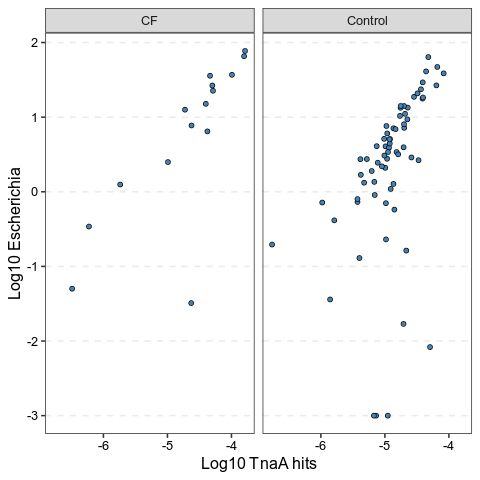

In [111]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + facet_wrap(~sample.type) + theme_bw(16) + t + xlab("Log10 TnaA hits") + ylab("Log10 Escherichia")

In [112]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus.loc[["Shigella"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Shigella"] / df_tnaA["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=-0.0893712412273357, pvalue=0.16403112807223683)
g__Escherichia SpearmanrResult(correlation=0.9805143314369733, pvalue=4.82778302850613e-173)
g__Porphyromonas SpearmanrResult(correlation=0.034374821829806765, pvalue=0.5930976380753353)


In [117]:
genus = "g__Escherichia"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
df_merge = df_merge.merge(infile_metadata, left_index=True, right_on="SRR")
%Rpush df_merge

[1] 0.9033974


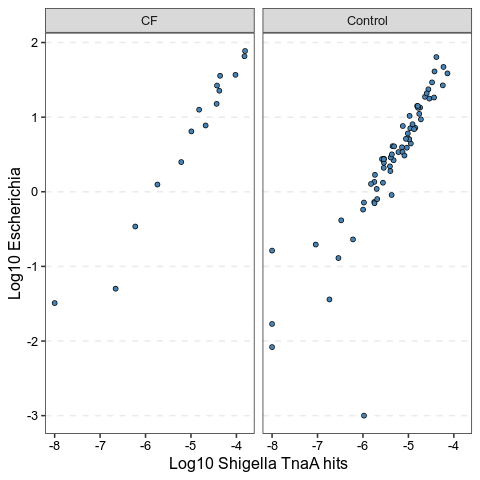

In [118]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Escherichia > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Escherichia+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Escherichia+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) +
facet_wrap(~sample.type) + theme_bw(16) + t + xlab("Log10 Shigella TnaA hits") + ylab("Log10 Escherichia")

In [119]:
genera_test = ["g__Bacteroides","g__Escherichia","g__Porphyromonas"]
df_genus_oi = df_tnaA_genus.loc[["Bacteroides"],:].T
df_genus_oi = df_genus_oi.merge(df_species_totals.T["k__Bacteria"], left_index=True, right_index=True)
df_genus_oi["read_frac"] = df_genus_oi["Bacteroides"] / df_genus_oi["k__Bacteria"] 

for genus in genera_test:
    df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
    print(genus, spearmanr(df_merge["read_frac"].values, df_merge[genus].values))

g__Bacteroides SpearmanrResult(correlation=0.6110665463644013, pvalue=2.2709104066117607e-26)
g__Escherichia SpearmanrResult(correlation=-0.05971339981958297, pvalue=0.3529966520293526)
g__Porphyromonas SpearmanrResult(correlation=0.04234831761164771, pvalue=0.5102808441801483)


In [120]:
genus = "g__Bacteroides"
df_merge = df_genus_oi.merge(df_species_rel_ab.query('index.str.contains("{}")'.format(genus)).T, left_index=True, right_index=True)
df_merge = df_merge.merge(infile_metadata, left_index=True, right_on="SRR")
%Rpush df_merge

[1] 0.5262241


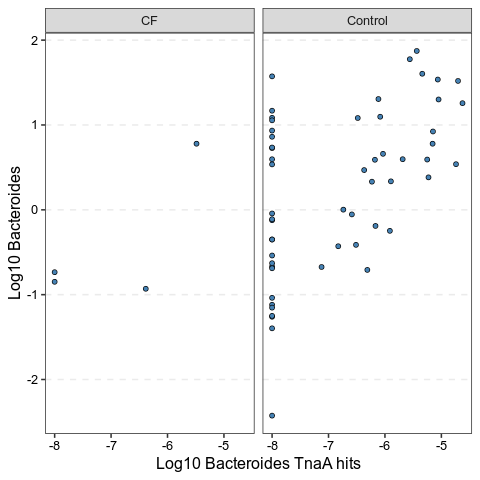

In [121]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) | (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + facet_wrap(~sample.type) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")

[1] 0.6630104


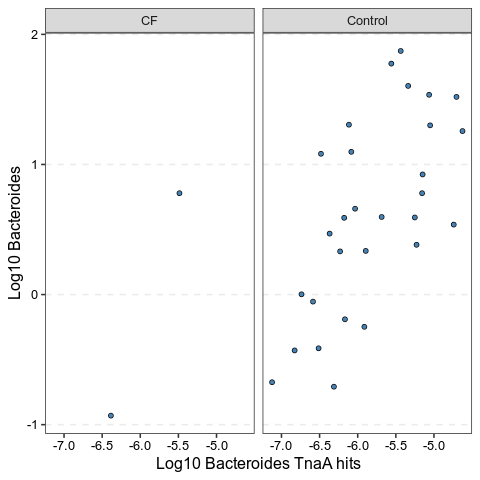

In [122]:
%%R

library('ggplot2')
source("/dartfs/rc/lab/R/RossB/SalernoP/metagenomics_data_backup/Aging_CF_Gut/Code_for_Figures/Lib/InfantAgeModels.R")

t <- improve_plot()

df_merge_sub <- dplyr::filter(df_merge, (read_frac > 0) & (g__Bacteroides > 0))
print(cor(log10(df_merge_sub$read_frac+1e-8), y=log10(df_merge_sub$g__Bacteroides+1e-3)), method="spearman")
ggplot(df_merge_sub, aes(x = log10(read_frac+1e-8), y=log10(g__Bacteroides+1e-3))) + geom_point(pch=21,fill="steelblue",size=2) + facet_wrap(~sample.type) + theme_bw(16) + t + xlab("Log10 Bacteroides TnaA hits") + ylab("Log10 Bacteroides")